# Bilateral Countermovement Jump - 100Hz, 500Hz, & 1,000Hz
# ---------------------------------------------------------------------------------------------------------------
## The purpose of this project will be to observe how much of an impact frequency rates (i.e. 100Hz, 500Hz, 1000Hz) has on the ability to record "accurate & precise" data. For simplicity purposes, we will assume that the subject performed all 3 jumps exactly the same. Because we are analyzing jumping data, we will primarily be paying attention to the Force:Z column (i.e., the vertical force).

<img src="Bilateral Countermovement Jump.jpeg" width = "500" />

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_100 = pd.read_csv('Bilateral Countermovement Jump 100Hz.csv')
df_500 = pd.read_csv('Bilateral Countermovement Jump 500Hz.csv')
df_1000 = pd.read_csv('Bilateral Countermovement Jump 1000Hz.csv')

In [3]:
# Notice the number of rows ("entries")
print(df_100.info())
print(df_500.info())
print(df_1000.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   COP:X     453 non-null    float64
 1   COP:Y     453 non-null    float64
 2   COP:Z     453 non-null    float64
 3   Ref:X     490 non-null    int64  
 4   Ref:Y     490 non-null    int64  
 5   Ref:Z     490 non-null    int64  
 6   Force:X   490 non-null    float64
 7   Force:Y   490 non-null    float64
 8   Force:Z   490 non-null    float64
 9   Moment:X  490 non-null    float64
 10  Moment:Y  490 non-null    float64
 11  Moment:Z  490 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 46.1 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2850 entries, 0 to 2849
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   COP:X     2650 non-null   float64
 1   COP:Y     2650 non-null   float64
 2   COP:Z     2650 non-null  

## <u>Sinple Statistical Breakdown:</u>
### I am just doing simple calculations for now, but may do more complex ones in the future. I did not include "Minimum" because it would be the same for each trial (Min. = 0), and I did not include "Range" because it would the exact same as "Maximum" anyways.

In [4]:
# 100Hz Statistics
df_100_mean = df_100['Force:Z'].mean()
df_100_median = df_100['Force:Z'].median()
df_100_max = df_100['Force:Z'].max()
df_100_std = df_100['Force:Z'].std()

# 500Hz Statistics
df_500_mean = df_500['Force:Z'].mean()
df_500_median = df_500['Force:Z'].median()
df_500_max = df_500['Force:Z'].max()
df_500_std = df_500['Force:Z'].std()

# 1,000Hz Statistics
df_1000_mean = df_1000['Force:Z'].mean()
df_1000_median = df_1000['Force:Z'].median()
df_1000_max = df_1000['Force:Z'].max()
df_1000_std = df_1000['Force:Z'].std()

In [5]:
# Force is measured in Newtons
data = {'Frequency': ['100Hz', '500Hz', '1,000Hz'],
       'Mean': [round(df_100_mean, 2), round(df_500_mean, 2), round(df_1000_mean, 2)],
       'Median': [round(df_100_median, 2), round(df_500_median, 2), round(df_1000_median, 2)],
       'Max': [round(df_100_max, 2), round(df_500_max, 2), round(df_1000_max, 2)],
       'Std': [round(df_100_std, 2), round(df_500_std, 2), round(df_1000_std, 2)]}

forceplate_stats = pd.DataFrame(data)
print(forceplate_stats)

  Frequency    Mean  Median      Max     Std
0     100Hz  682.32  682.15  2385.86  332.92
1     500Hz  682.61  682.68  2886.20  313.91
2   1,000Hz  682.37  682.23  3181.03  348.76


In [6]:
mean_data = [round(df_100_mean, 2), round(df_500_mean, 2), round(df_1000_mean, 2)]
median_data = [round(df_100_median, 2), round(df_500_median, 2), round(df_1000_median, 2)]
max_data = [round(df_100_max, 2), round(df_500_max, 2), round(df_1000_max, 2)]
std_data = [round(df_100_std, 2), round(df_500_std, 2), round(df_1000_std, 2)]

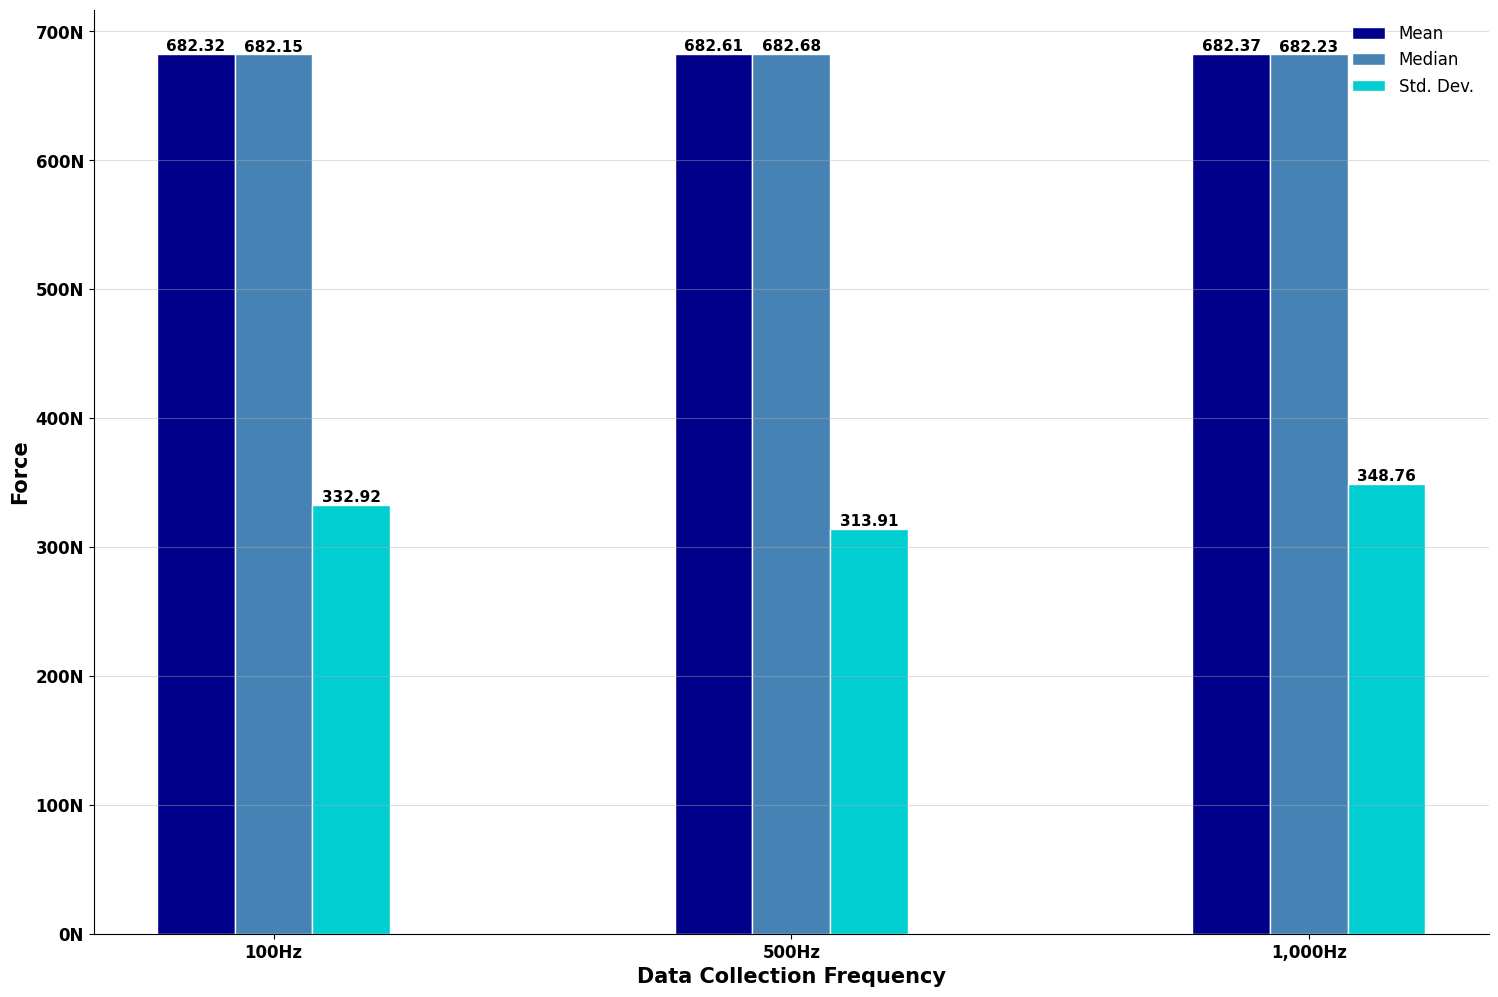

In [7]:
plt.figure(figsize = (18, 12))
x = np.arange(3)
barwidth = 0.15

plt.bar(x - (barwidth), mean_data, width = barwidth, label = 'Mean', edgecolor = 'white', color = 'darkblue')
plt.bar(x, median_data, width = barwidth, label = 'Median', edgecolor = 'white', color = 'steelblue')
plt.bar(x + (barwidth), std_data, width = barwidth, label = 'Std. Dev.', edgecolor = 'white', color = 'darkturquoise')

plt.xticks([0, 1, 2], ["100Hz", "500Hz", "1,000Hz"], fontsize = 12, fontweight = 'bold')
plt.xlabel("Data Collection Frequency", fontsize = 15, fontweight = 'bold')
plt.yticks([0, 100, 200, 300, 400, 500, 600, 700], ['0N', '100N', '200N', '300N', '400N', '500N', '600N', '700N'], 
           fontsize = 12, fontweight = 'bold')
plt.ylabel("Force", fontsize = 15, fontweight = 'bold')

for i in range(3):
    plt.text(i - (barwidth), mean_data[i], mean_data[i], ha = 'center', va = 'bottom', fontsize = 11, fontweight = 'bold')
for i in range(3):
    plt.text(i, median_data[i], median_data[i], ha = 'center', va = 'bottom', fontsize = 11, fontweight = 'bold')
for i in range(3):
    plt.text(i + (barwidth), std_data[i], std_data[i], ha = 'center', va = 'bottom', fontsize = 11, fontweight = 'bold')
plt.legend(frameon = False, fontsize = 12)
plt.grid(axis = 'y', alpha = 0.4)
sns.despine()
plt.show()

## The remarkably close values between the Mean & Median across all three trials shows how well the participant did at repeating the jumps as similar as possible to each other.

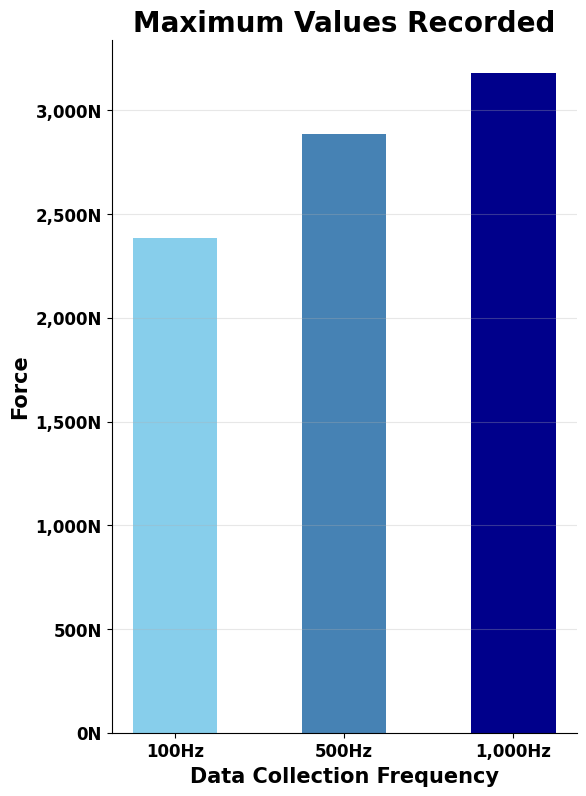

In [8]:
frequencies = ["100Hz", "500Hz", "1,000Hz"]

plt.figure(figsize = (6, 9))
plt.bar(frequencies, max_data, width = 0.5, color = ['skyblue', 'steelblue', 'darkblue'])
plt.xticks(fontsize = 12, fontweight = 'bold')
plt.xlabel("Data Collection Frequency", fontsize = 15, fontweight = 'bold')
plt.yticks([0, 500, 1000, 1500, 2000, 2500, 3000], ['0N', '500N', '1,000N', '1,500N', '2,000N', '2,500N', '3,000N'], 
           fontsize = 12, fontweight = 'bold')
plt.ylabel("Force", fontsize = 15, fontweight = 'bold')
plt.title("Maximum Values Recorded", fontsize = 20, fontweight = 'bold')

plt.grid(axis = 'y', alpha = 0.3)
sns.despine()
plt.show()

# --------------------------------------------------------------------------------------------------------------
## Now we take a look at what the force plate recorded (vertical force production) over the course of the jump

### This what the graph looks like for the 100Hz trial. Note: each trial was almost exactly 5sec. in length. 

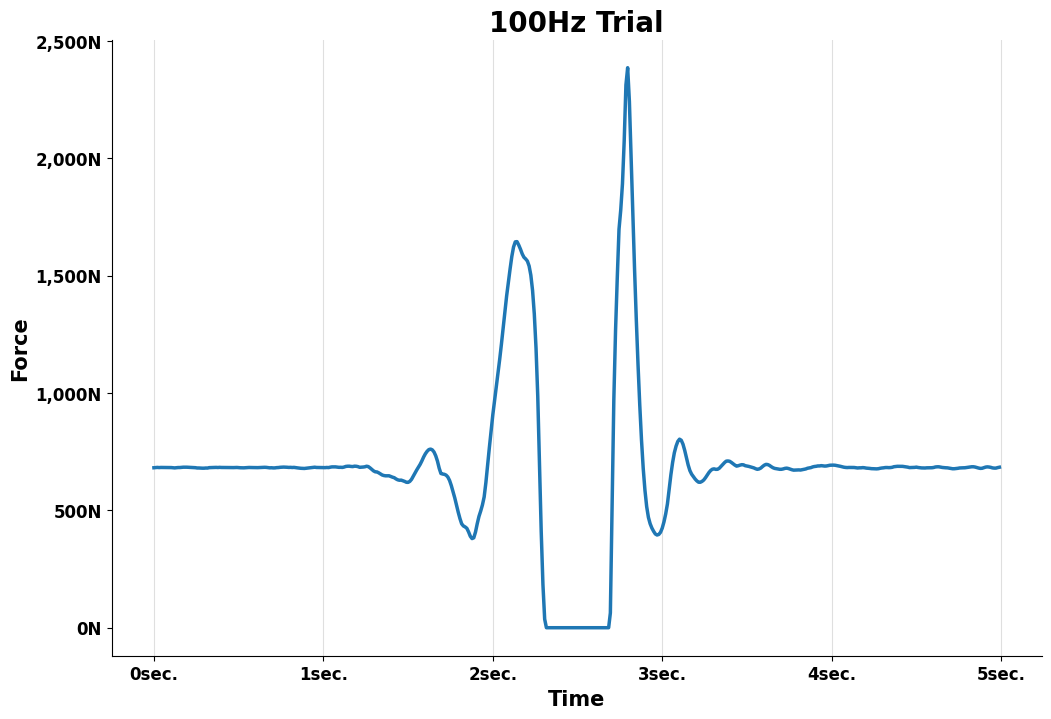

In [9]:
plt.figure(figsize = (12,8))
plt.plot(df_100['Force:Z'], linewidth = 2.5)
plt.xticks([0.0, (1/5) * float(len(df_100['Force:Z'])), (2/5) * float(len(df_100['Force:Z'])), 
            (3/5) * float(len(df_100['Force:Z'])), (4/5) * float(len(df_100['Force:Z'])), float(len(df_100['Force:Z']))],
          ['0sec.', '1sec.', '2sec.', '3sec.', '4sec.', '5sec.'], fontsize = 12, fontweight = 'bold')
plt.xlabel('Time', fontsize = 15, fontweight = 'bold')
plt.yticks([0, 500, 1000, 1500, 2000, 2500], ['0N', '500N', '1,000N', '1,500N', '2,000N', '2,500N'], 
           fontsize = 12, fontweight = 'bold')
plt.ylabel('Force', fontsize = 15, fontweight = 'bold')
plt.title('100Hz Trial', fontsize = 20, fontweight = 'bold')

plt.grid(axis = 'x', alpha = 0.4)
sns.despine()
plt.show()

### <u>What is happening in the above graph</u>: &uarr; &uarr; &uarr; &uarr; &uarr; &uarr; &uarr; &uarr; &uarr; &uarr;
### 0-1sec: Just standing...this is their "bodyweight" in Newtons
### 1-2sec: 1.) Raising arms/bending elbows 2.) Bringing arms back while bending hips & knees 3.) Just starting to begin the upward movement of the jump
### 2-3sec: 1.) Pushing hard into the ground with feet & raising arms again to assist with vertical movement/momentum 2.) At 0 Newtons the participant is in the air 3.) They then quickly land back on the force plate with an impact force over 3 times their bodyweight
### 3-4sec: Using legs, arms, and core musculature to re-stabilize from the landing
### 4-5sec: Just standing again

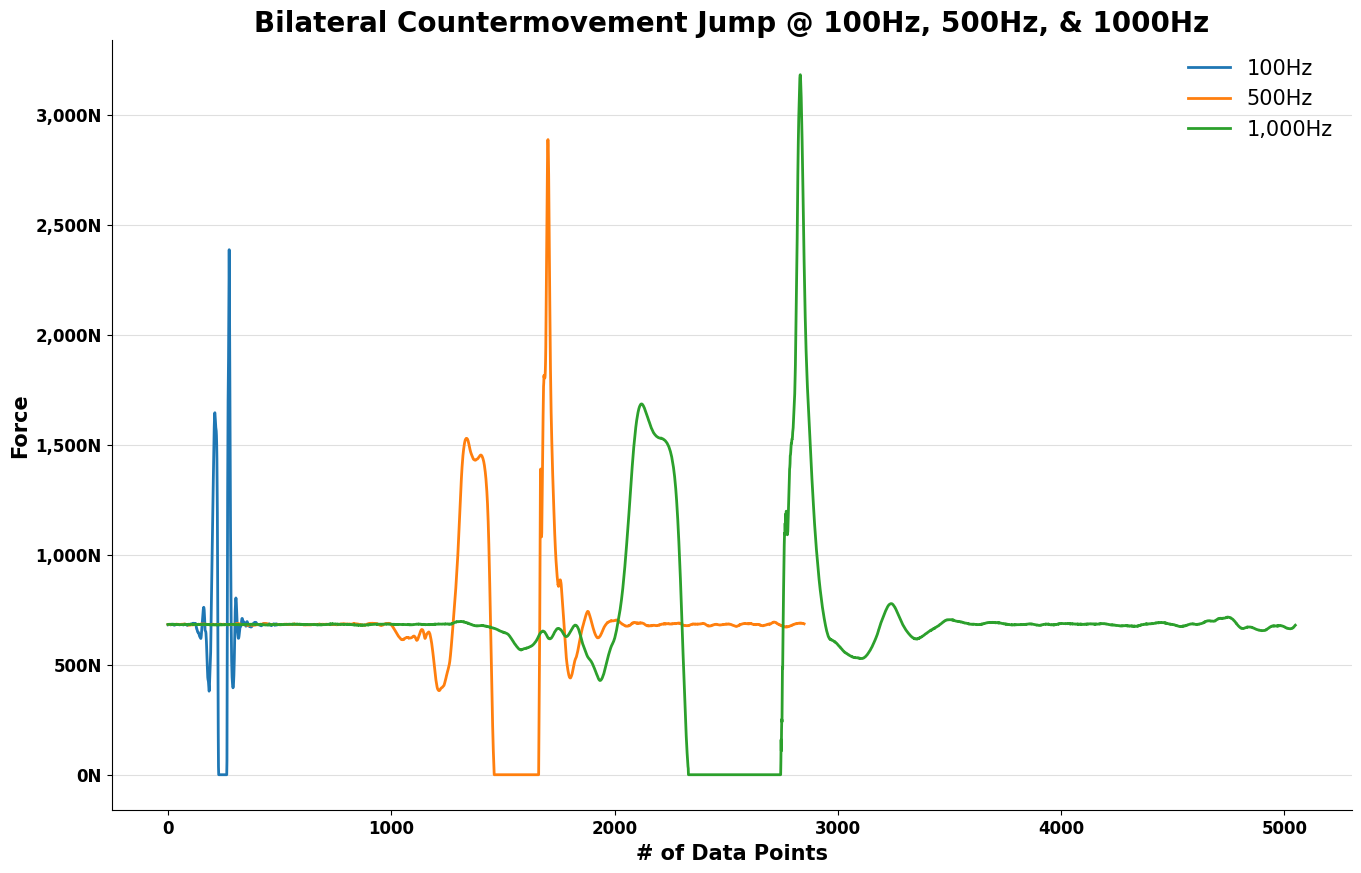

In [10]:
plt.figure(figsize = (16,10))

plt.plot(df_100['Force:Z'], label = '100Hz', linewidth = 2)
plt.plot(df_500['Force:Z'], label = '500Hz', linewidth = 2)
plt.plot(df_1000['Force:Z'], label = '1,000Hz', linewidth = 2)

plt.xticks(fontsize = 12, fontweight = 'bold')
plt.xlabel('# of Data Points', fontsize = 15, fontweight = 'bold')
plt.yticks([0, 500, 1000, 1500, 2000, 2500, 3000], ['0N', '500N', '1,000N', '1,500N', '2,000N', '2,500N', '3,000N'], 
           fontsize = 12, fontweight = 'bold')
plt.ylabel('Force', fontsize = 15, fontweight = 'bold')
plt.title('Bilateral Countermovement Jump @ 100Hz, 500Hz, & 1000Hz', fontsize = 20, fontweight = 'bold')

plt.grid(axis = 'y', alpha = 0.4)
sns.despine()
plt.legend(frameon = False, fontsize = 15)
plt.show()

## ...So as you can see from the above graph, using 1,000Hz for future testing is recommended due to the nature of how fast of a movement a jump is and how quickly the forces from jumping & landing are produced. The 100Hz and 500Hz trials did not capture enough of the data to make a confident conclusion regarding how much force was produced and when it was produced. With that being said, there is obviously a frequency(Hz) level that is considered too high depending on what is being measured, and there will be an accumulation of redundant data points interfering with the measurement. 